# Aztec G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

## Perform Simulation

In [2]:
from aztec_gddt.experiment import test_run

# HACK in order to do sims in single mode
runs = 3
sim_dfs = []
for run in range(runs):
    sim_dfs.append(test_run().set_index('l1_blocks_passed').assign(run=run))
mc_traj_df = pd.concat(sim_dfs)

traj_df = mc_traj_df.query("run == 0 & subset == 0 & simulation == 0")
traj_df.columns

Index(['index', 'delta_l1_blocks', 'l2_blocks_passed', 'agents',
       'validator_set', 'PROVING_COST_MODIFIER', 'current_epoch', 'last_epoch',
       'last_reward_time_in_l1', 'last_reward', 'market_price_juice_per_mana',
       'market_price_l1_gas', 'market_price_l1_blobgas',
       'oracle_price_juice_per_mana', 'oracle_price_l1_gas',
       'oracle_price_l1_blobgas', 'oracle_proving_cost',
       'congestion_multiplier', 'excess_mana', 'base_fee', 'cumm_empty_blocks',
       'cumm_unproven_epochs', 'cumm_dropped_tx', 'cumm_excl_tx',
       'cumm_total_tx', 'cumm_resolved_epochs', 'cumm_finalized_epochs',
       'cumm_mana_used_on_finalized_blocks', 'cumm_finalized_blocks',
       'simulation', 'subset', 'run', 'timestep', 'label',
       'timestep_in_l1_blocks', 'general', 'fee', 'reward', 'stake', 'slash',
       'behavior'],
      dtype='object')

## Visualization over Model Features

In [3]:
traj_df.head(5)

,index,delta_l1_blocks,l2_blocks_passed,agents,validator_set,PROVING_COST_MODIFIER,current_epoch,last_epoch,last_reward_time_in_l1,last_reward,...,run,timestep,label,timestep_in_l1_blocks,general,fee,reward,stake,slash,behavior
l1_blocks_passed,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,"[Agent(uuid='0', commitment_bond=1.22042261052...",{},0.0,"Epoch(init_time_in_l1=-999, validators=[], slo...","Epoch(init_time_in_l1=-999, validators=[], slo...",0,15000.0,...,0,0,default,1,"GeneralParams(OVERHEAD_MANA_PER_TX=10000, MAXI...","FeeParams(TARGET_MANA_PER_BLOCK=10000000, BLOB...","RewardParams(BLOCK_REWARD_VOLATILITY=3.17e-06,...","StakingParams(MIN_STAKE=32, VALIDATOR_COMMITTE...","SlashingParams(BOND_SIZE=1, BOND_SLASH_PERCENT...",BehavioralParams(AVERAGE_TX_COUNT_PER_SLOT=360)
1,6,1,1,"[Agent(uuid='0', commitment_bond=1.22042261052...",{},0.0,"Epoch(init_time_in_l1=1, validators=['202', '1...","Epoch(init_time_in_l1=-999, validators=[], slo...",0,15000.0,...,0,1,default,1,"GeneralParams(OVERHEAD_MANA_PER_TX=10000, MAXI...","FeeParams(TARGET_MANA_PER_BLOCK=10000000, BLOB...","RewardParams(BLOCK_REWARD_VOLATILITY=3.17e-06,...","StakingParams(MIN_STAKE=32, VALIDATOR_COMMITTE...","SlashingParams(BOND_SIZE=1, BOND_SLASH_PERCENT...",BehavioralParams(AVERAGE_TX_COUNT_PER_SLOT=360)
2,12,1,1,"[Agent(uuid='0', commitment_bond=1.22042261052...",{},0.0,"Epoch(init_time_in_l1=1, validators=['202', '1...","Epoch(init_time_in_l1=-999, validators=[], slo...",0,15000.0,...,0,2,default,1,"GeneralParams(OVERHEAD_MANA_PER_TX=10000, MAXI...","FeeParams(TARGET_MANA_PER_BLOCK=10000000, BLOB...","RewardParams(BLOCK_REWARD_VOLATILITY=3.17e-06,...","StakingParams(MIN_STAKE=32, VALIDATOR_COMMITTE...","SlashingParams(BOND_SIZE=1, BOND_SLASH_PERCENT...",BehavioralParams(AVERAGE_TX_COUNT_PER_SLOT=360)
3,18,1,1,"[Agent(uuid='0', commitment_bond=1.22042261052...",{},0.0,"Epoch(init_time_in_l1=1, validators=['202', '1...","Epoch(init_time_in_l1=-999, validators=[], slo...",0,15000.0,...,0,3,default,1,"GeneralParams(OVERHEAD_MANA_PER_TX=10000, MAXI...","FeeParams(TARGET_MANA_PER_BLOCK=10000000, BLOB...","RewardParams(BLOCK_REWARD_VOLATILITY=3.17e-06,...","StakingParams(MIN_STAKE=32, VALIDATOR_COMMITTE...","SlashingParams(BOND_SIZE=1, BOND_SLASH_PERCENT...",BehavioralParams(AVERAGE_TX_COUNT_PER_SLOT=360)
4,24,1,2,"[Agent(uuid='0', commitment_bond=1.22042261052...",{},0.0,"Epoch(init_time_in_l1=1, validators=['202', '1...","Epoch(init_time_in_l1=-999, validators=[], slo...",0,15000.0,...,0,4,default,1,"GeneralParams(OVERHEAD_MANA_PER_TX=10000, MAXI...","FeeParams(TARGET_MANA_PER_BLOCK=10000000, BLOB...","RewardParams(BLOCK_REWARD_VOLATILITY=3.17e-06,...","StakingParams(MIN_STAKE=32, VALIDATOR_COMMITTE...","SlashingParams(BOND_SIZE=1, BOND_SLASH_PERCENT...",BehavioralParams(AVERAGE_TX_COUNT_PER_SLOT=360)


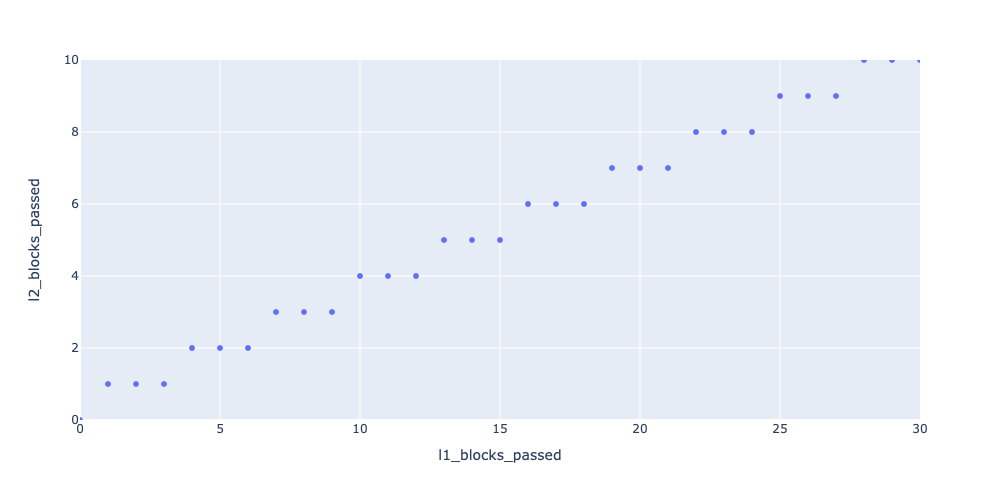

In [4]:
fig = px.scatter(traj_df.reset_index(), 'l1_blocks_passed', 'l2_blocks_passed')
fig.update_layout(yaxis_range=[0, 10], xaxis_range=[0,  10 * 3], width=1000, height=500)
fig.show()

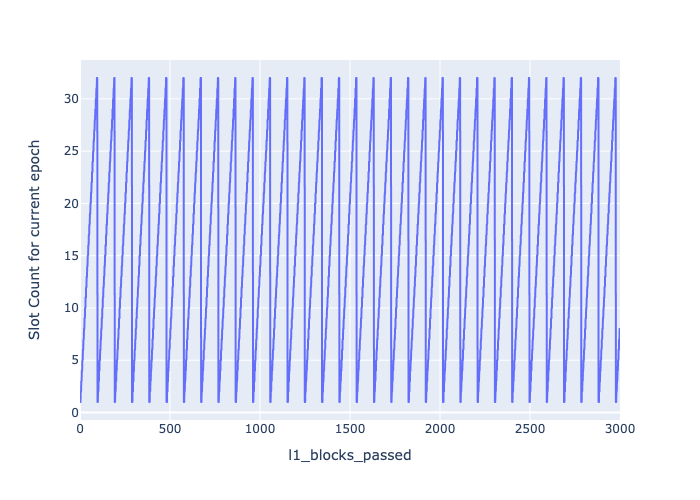

In [5]:
y = traj_df.current_epoch.map(lambda x: len(x.slots))

fig = px.line(traj_df, y=y, labels={"x": 'timestep', 'y': 'Slot Count for current epoch'})
fig.show()

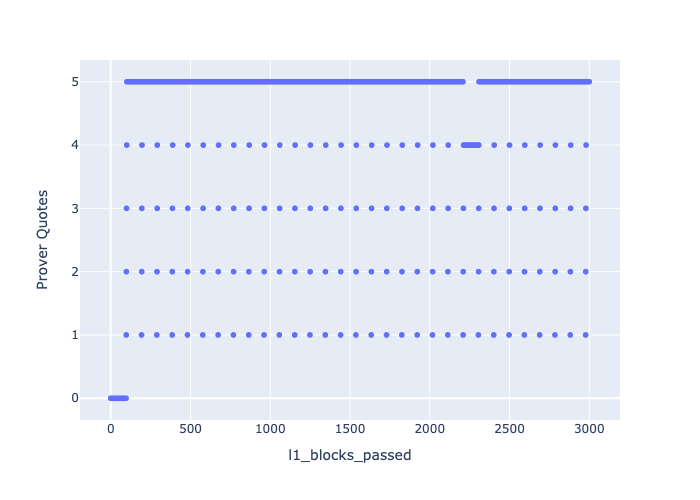

In [6]:
y = traj_df.last_epoch.map(lambda x: len(x.prover_quotes))

fig = px.scatter(traj_df, y=y, labels={"x": 'timestep', 'y': 'Prover Quotes'})
fig.show()

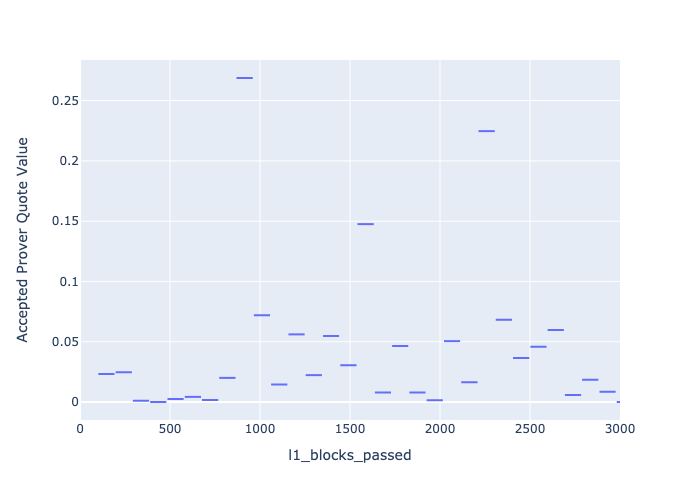

In [7]:
y = traj_df.last_epoch.map(lambda x: x.accepted_prover_quote)

fig = px.line(traj_df, y=y, labels={"x": 'timestep', 'y': 'Accepted Prover Quote Value'})
fig.show()

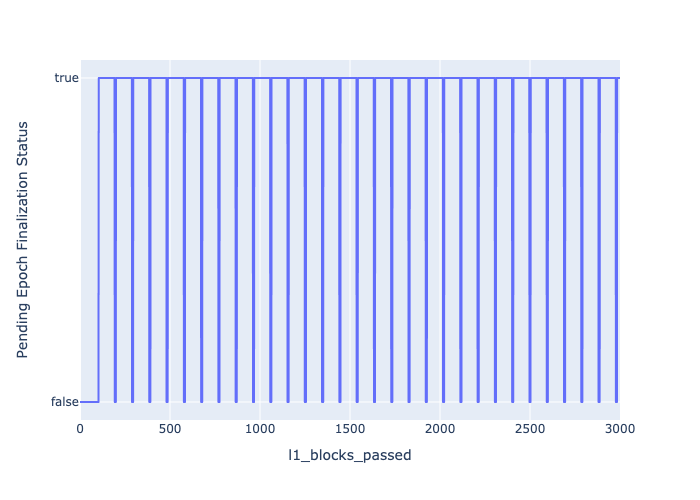

In [8]:
y = traj_df.last_epoch.map(lambda x: x.finalized)

fig = px.line(traj_df, y=y, labels={"x": 'timestep', 'y': 'Pending Epoch Finalization Status'})
fig.show()

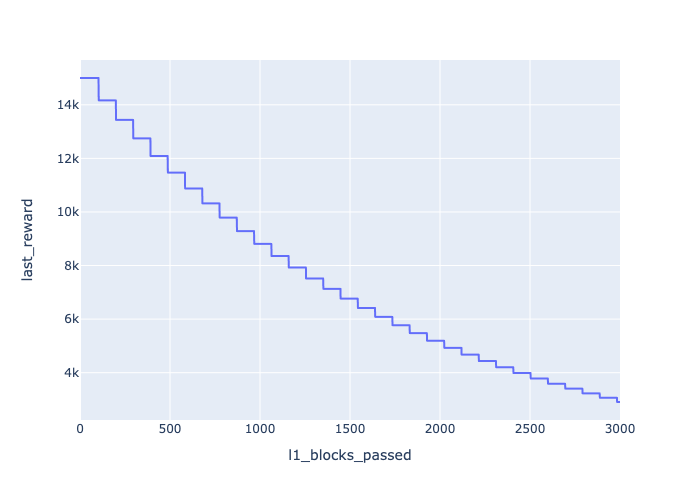

In [9]:
y = traj_df.last_reward

fig = px.line(traj_df, y=y, labels={"x": 'timestep', 'y': 'Last Reward'})
fig.show()

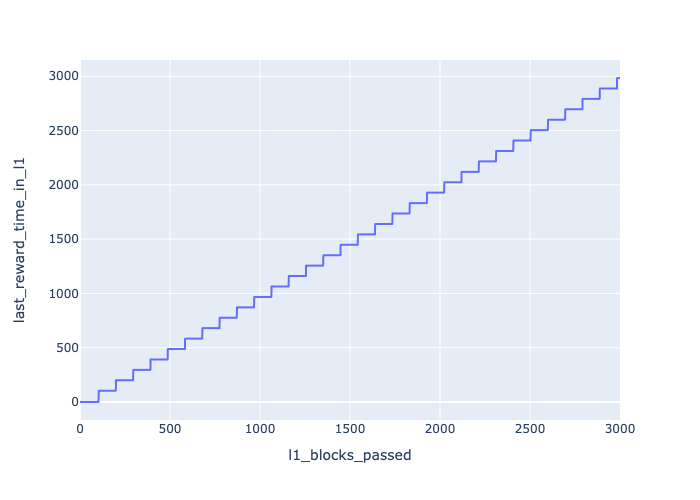

In [10]:
y = traj_df.last_reward_time_in_l1

fig = px.line(traj_df, y=y, labels={"x": 'timestep', 'y': 'Last Reward Time'})
fig.show()

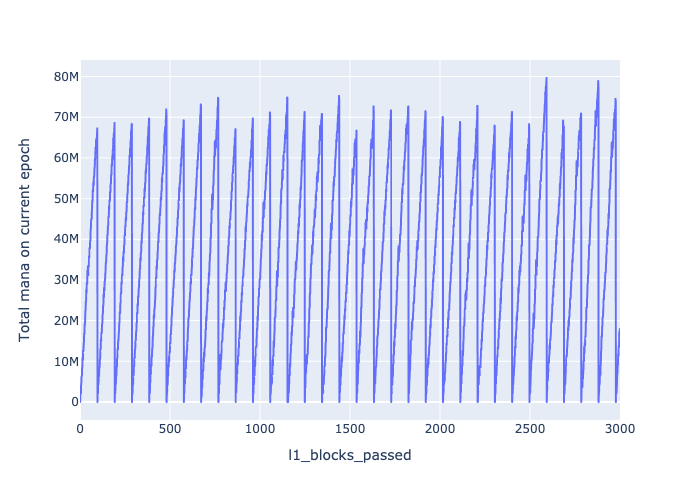

In [11]:
y = traj_df.current_epoch.map(lambda x: sum(s.tx_total_mana for s in x.slots))

fig = px.line(traj_df, y=y, labels={"x": 'timestep', 'y': 'Total mana on current epoch'})
fig.show()

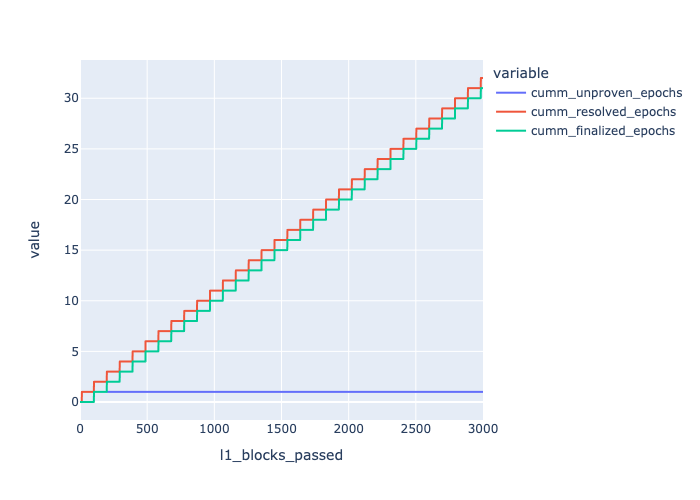

In [12]:
y = ['cumm_unproven_epochs', 'cumm_resolved_epochs', 'cumm_finalized_epochs']

fig = px.line(traj_df, y=y)
fig.show()

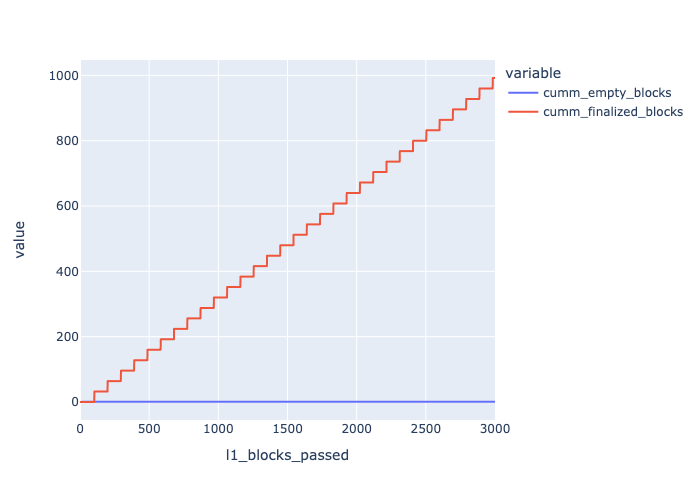

In [13]:
y = ['cumm_empty_blocks', 'cumm_finalized_blocks']

fig = px.line(traj_df, y=y)
fig.show()

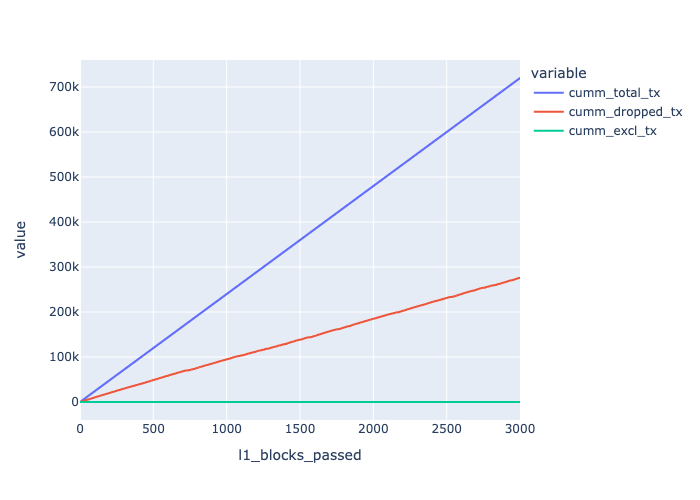

In [27]:
y = ['cumm_total_tx', 'cumm_dropped_tx', 'cumm_excl_tx']

fig = px.line(traj_df, y=y)
fig.show()

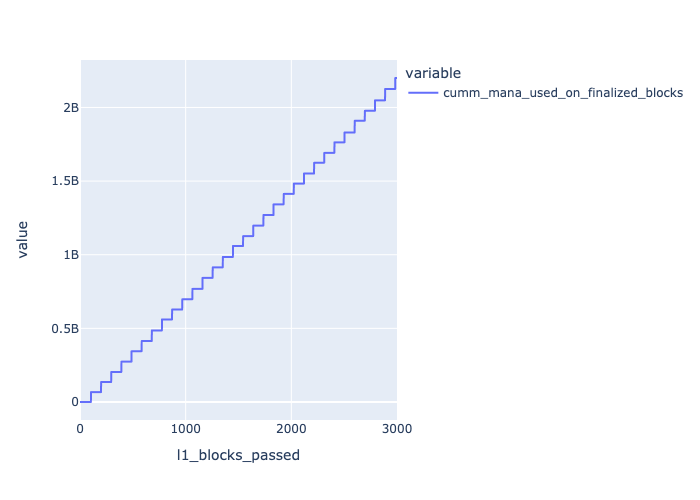

In [14]:
y = ['cumm_mana_used_on_finalized_blocks']

fig = px.line(traj_df, y=y)
fig.show()

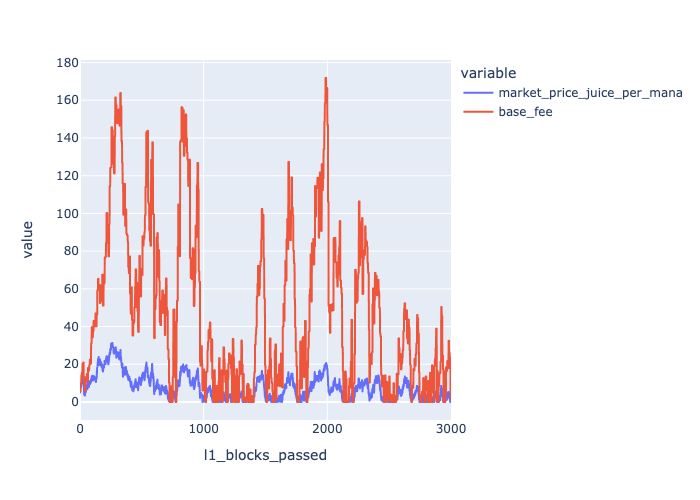

In [15]:
y = ['market_price_juice_per_mana', 'base_fee']

fig = px.line(traj_df, y=y)
fig.show()

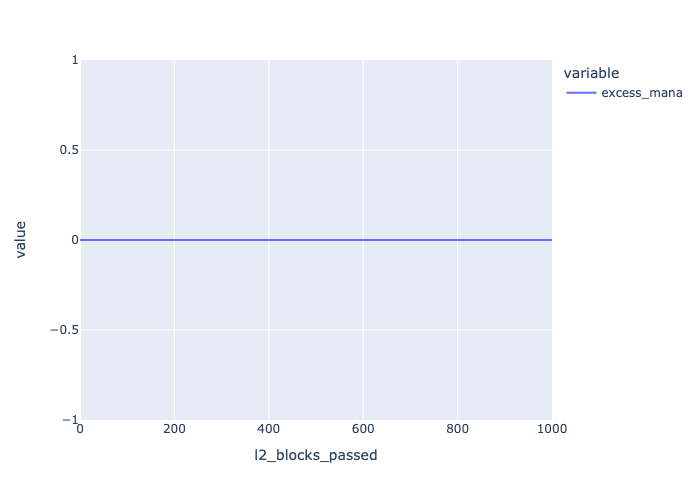

In [16]:
x = 'l2_blocks_passed'
y = ['excess_mana']

fig = px.line(traj_df, x=x, y=y)
fig.show()

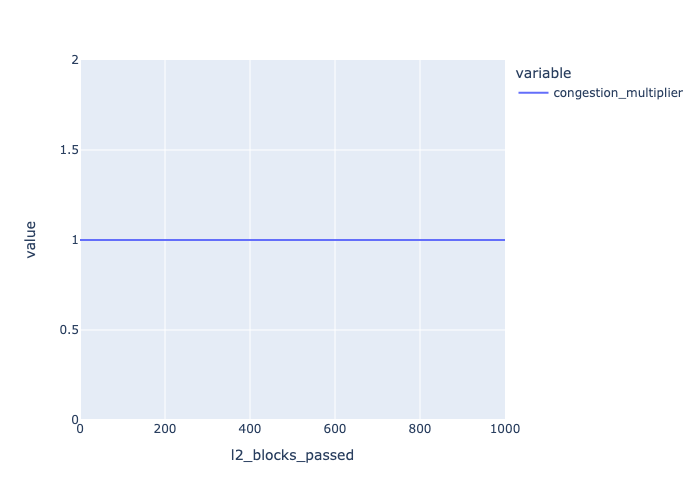

In [17]:
x = 'l2_blocks_passed'
y = ['congestion_multiplier']

fig = px.line(traj_df, x=x, y=y)
fig.show()

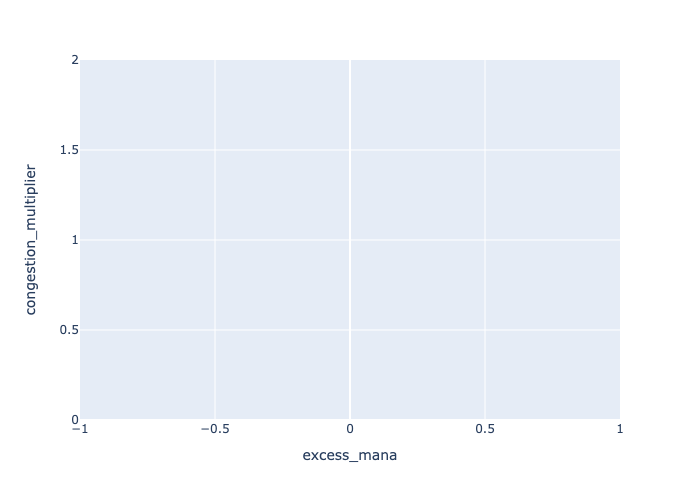

In [18]:

fig = px.line(traj_df, x='excess_mana', y='congestion_multiplier')
fig.update_traces(opacity=.4)
fig.show()

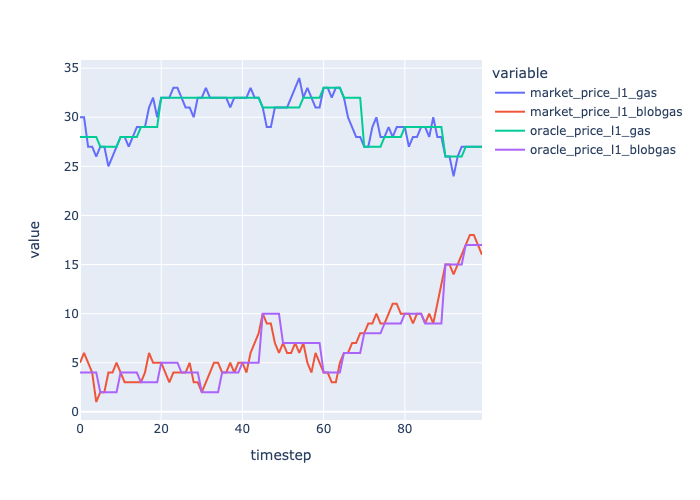

In [19]:
x = 'timestep'
y = ['market_price_l1_gas', 'market_price_l1_blobgas',
      'oracle_price_l1_gas', 'oracle_price_l1_blobgas']

fig = px.line(traj_df.query('timestep < 100'), x=x, y=y)
fig.show()

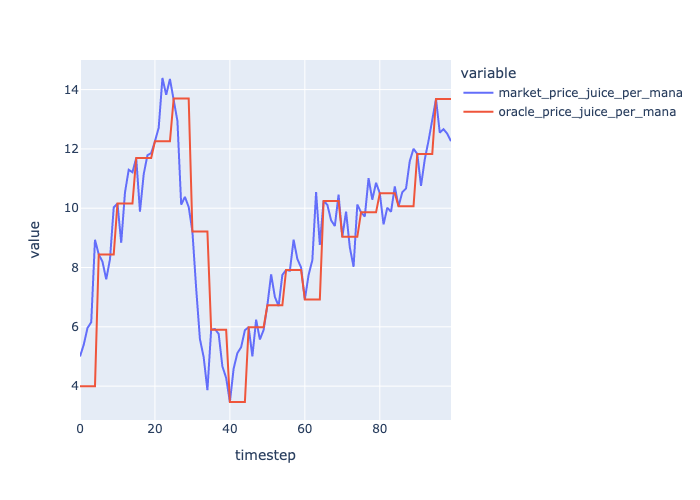

In [20]:
y = ['market_price_juice_per_mana', 'oracle_price_juice_per_mana']

fig = px.line(traj_df.query('timestep < 100'), x=x, y=y)
fig.show()

/Users/danlessa/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



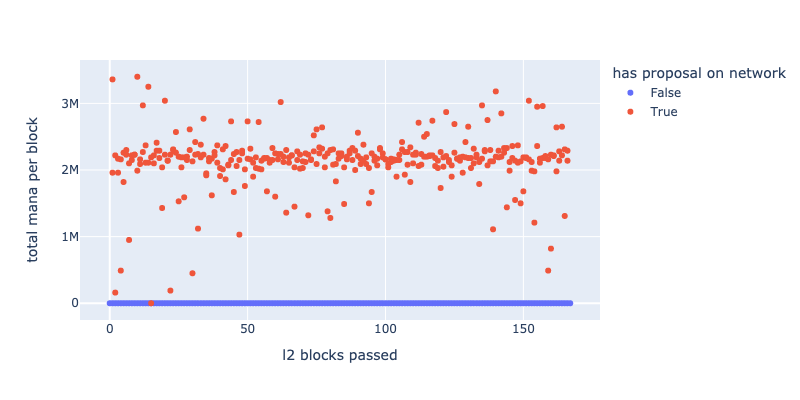

In [21]:

N = 500
x = traj_df.l2_blocks_passed.head(N)
y = traj_df.current_epoch.map(lambda x: x.slots[-1].tx_total_mana).head(N)
c = traj_df.current_epoch.map(
    lambda x: x.slots[-1].has_proposal_on_network).head(N)

fig = px.scatter(
    x=x,
    y=y,
    color=c, labels={
        "x": "l2 blocks passed",
        "y": "total mana per block",
        "color": "has proposal on network"},
    width=800,
    height=400)
fig.show()

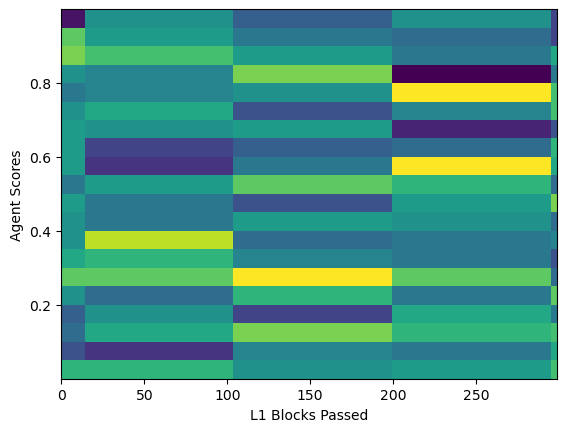

In [22]:
x = []
y = []
for i, row in traj_df.head(300).iterrows():
    y_lst = [a.score for a in row.agents]
    y += y_lst
    x += len(y_lst) * [i]

plt.hist2d(x, y, bins=(300, 20))
plt.xlabel('L1 Blocks Passed')
plt.ylabel('Agent Scores')
plt.show()

## Visualization over PSUU Per-Trajectory Metrics

In [23]:
from aztec_gddt.psuu.metrics import *

In [24]:
for label, fn in PER_TRAJECTORY_METRICS.items():
    print(f"{label}: {fn.__name__}")
    print(mc_traj_df.reset_index().groupby(['simulation', 'subset', 'run']).apply(fn, include_groups=False))
    print("---")

T-M1: relative_volatility_across_time
simulation  subset  run
0           0       0      0.156694
                    1      0.157151
                    2      0.171964
dtype: float64
---
T-M2: empty_blocks_during_trajectory
simulation  subset  run
0           0       0      1
                    1      1
                    2      1
dtype: int64
---
T-M3: unproven_epochs_during_trajectory
simulation  subset  run
0           0       0      1
                    1      1
                    2      1
dtype: int64
---
T-M4: fraction_dropped_tx_during_trajectory
simulation  subset  run
0           0       0      0.383717
                    1      0.394906
                    2      0.392497
dtype: float64
---
T-M5: fraction_excluded_tx_during_trajectory
simulation  subset  run
0           0       0      0.0
                    1      0.0
                    2      0.0
dtype: float64
---
T-M6: base_fee_rebound_inside_range
simulation  subset  run
0           0       0      True
          